# Analysing Data from Multiple Files

### Questions

- How can I do the same operations on many files?

### Objectives

- Use a library function to get a list of filenames that match a wildcard pattern.
- Write a `for` loop to process multiple files.

To work with multiple files, we are going to use a new library: `glob`.

The `glob`library contains a function, also called `glob()`, that finds files and directories whose nmaes match a pattern.

We provide those patterns as strings: the character `*` matches **zero or more** characters, while `?` matches **any one** character. We can use this to get the names of all of the `.csv` files in the inflammation data directory.

We'll also import a library called `prettyprint` that will make the output easier to check.

In [3]:
import glob
import pprint

pprint.pprint(glob.glob('swc-python/data/inflammation*.csv'))

['swc-python/data/inflammation-01.csv',
 'swc-python/data/inflammation-02.csv',
 'swc-python/data/inflammation-03.csv',
 'swc-python/data/inflammation-04.csv',
 'swc-python/data/inflammation-05.csv',
 'swc-python/data/inflammation-06.csv',
 'swc-python/data/inflammation-07.csv',
 'swc-python/data/inflammation-08.csv',
 'swc-python/data/inflammation-09.csv',
 'swc-python/data/inflammation-10.csv',
 'swc-python/data/inflammation-11.csv',
 'swc-python/data/inflammation-12.csv']


`glob.glob's` output is a list of file paths. This will let us loop over its output to do somoething with each filename in turn.

What we wouldlike to do is generate a set of plots for each file in the inflammation dataset.

We'll start by analysing the first three files. If we want to make sure we get them in alphabetical order, we can use the `sorted()` built-in function.

swc-python/data/inflammation-01.csv


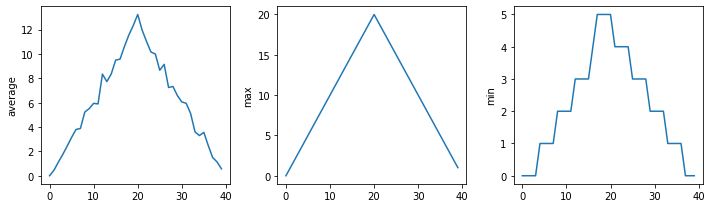

swc-python/data/inflammation-02.csv


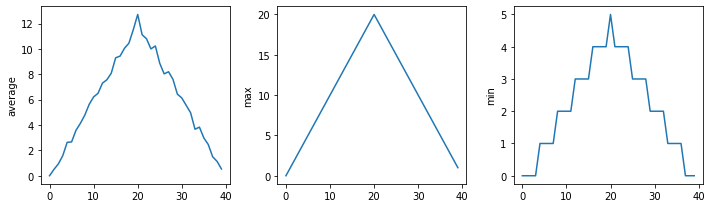

swc-python/data/inflammation-03.csv


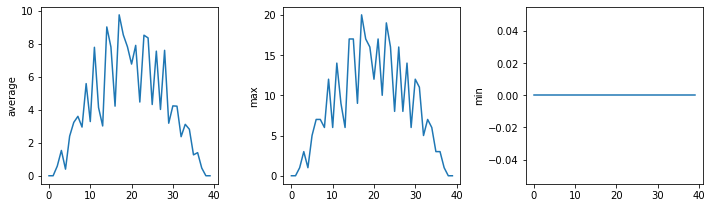

In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt

# Get the list of files matching our pattern
filenames = sorted(glob.glob('swc-python/data/inflammation*.csv'))

# Take only the first three elements from filenames (a list)
filenames = filenames[0:3]

# for loop to iterate through all of the files
for filename in filenames:
    print(filename)

    # This section is the same script we used in the previous lesson
    data = np.loadtxt(fname=filename, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))

    axis1 = fig.add_subplot(1, 3, 1)
    axis2 = fig.add_subplot(1, 3, 2)
    axis3 = fig.add_subplot(1, 3, 3)

    axis1.set_ylabel('average')
    axis1.plot(np.mean(data, axis=0))

    axis2.set_ylabel('max')
    axis2.plot(np.max(data, axis=0))

    axis3.set_ylabel('min')
    axis3.plot(np.min(data, axis=0))

    fig.tight_layout()
    plt.show()


The maxima of the first two data sets show exactly the same ramp as the first, and their minima show the same staircase structure. 

A different situation has been revealed in the third dataset, where the maxima are a bit less regular, but the minima are consistently zero.

## Exercises

### 1. Plotting Differences

Plot the difference between the average inflammations reported in the first and second datasets (stored in `swc-python/data/inflammation-01.csv` and `swc-python/data/inflammation-02.csv`, respectively), i.e., the difference between the leftmost plots of the first two figures.

In [4]:
# Do Exercise 1 here


### 2. Generate Composite Statistics
Use each of the files once to generate a dataset containing values averaged over all patients:

```python
filenames = glob.glob('inflammation*.csv')
composite_data = np.zeros((60,40))
for filename in filenames:
    # sum each new file's data into composite_data as it's read
    # and then divide the composite_data by number of samples
composite_data = composite_data / len(filenames)
```

Then use `plt` to generate `mean()`, `max()`, and `min()` for all patients.

In [ ]:
# Do Exercise 2 here
